# 양자 순간이동 (Quantum Teleportation)

## 양자 프로토콜 (Quantum Protocol)

만약 여러분이 멀리 떨어져있는 친구에게 정보를 전달하고 싶을 땐 어떻게 하시나요?  
보통은 제가 가지고 있는 정보의 복사본을 친구에게 보내는 것으로 정보를 전달할 수 있습니다.

그러나, 양자역학에는 **복제 불가능의 정리 (No-cloning theorem)**에 의해 양자 상태를 복사할 수가 없습니다.  
<font color=blue>c.f) No-cloning theorem : </font>

그렇담 양자 상태의 정보를 어떻게 보낼 수 있을까요?

## 양자 얽힘 (Quantum Entanglement)
양자 프로토콜에서는 정보를 전달하기 위해 얽힘을 사용합니다.  
이렇게 얽힘을 사용한 프로토콜로는 **초고밀도 코드화(Superdence Coding)**와 **양자 순간이동(Quantum Teleportation)**이 있습니다.  
그런데 얽힘(Entanglement)이 무엇일까요?

얽힘의 정의는 물리적 정의와 수학적 정의 두개로 나눠볼 수 있습니다.

<font color=green>**1. 물리적 정의**</font>  
한 쌍의 양자가 측정에 대하여 밀접하게 연관되어 있는 상태  
즉, 하나를 측정하면 다른 하나를 알 수 있는 상태  


<font color=green>**2. 수학적 정의**</font>  
2개의 single qubit의 tensor product로 나타낼 수 없는 two qubit 상태  
ex) Bell state (=Bell pair, EPR pair)  
<img src="bell_state.png" width="800px" height="300px" alt="bellstate"></img>

## 양자 순간이동 (Quantum Teleportation)
멀리 떨어진 곳에 정보를 전달하기 위해 얽힘을 사용하는 대표적인 프로토콜로 <font color=red>**양자 순간이동**</font>이 있습니다!   

여러분이 생각하시는 순간이동은 영화에서 흔히 보시는 여기 있는 몸이 다른 곳으로 이동하는 것일텐데요,   
양자 순간이동은 물질이 아니라 **정보가 이동하는 것**입니다.  

<img src="people.png" width="300px" height="150px" alt="people"></img>

양자 순간이동은 2개의 classical bit를 사용해서 1개의 qubit를 전송합니다.  
(이와 달리, 초고밀도 코드화에서는 1개의 qubit를 사용하여 2개의 classical bit를 전송합니다)  

### 양자 순간이동(Quantum Teleportation)의 회로 및 Qiskit 구현

<img src="teleportation.png" width="900px" height="450px" alt="teleportation"></img>

**<p style="font-size:17px">Step 0. Entangled pair $|\beta_{00}\rangle$ 생성</p>**
#### Quantum Circuit 정의

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider
from qiskit.circuit import IfElseOp

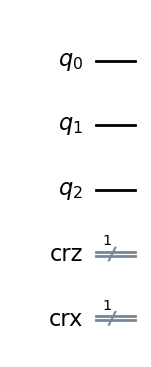

In [2]:
qr = QuantumRegister(3, name="q")    # 3개의 qubit를 사용하고
crz = ClassicalRegister(1, name="crz") # 측정 결과를 위해 2개의 classical bit를 사용합니다.
crx = ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

teleportation_circuit.draw("mpl")

#### Entanglement pair (Bell pair) 생성

얽힘 상태를 만드는 회로를 통해 다음과 같은 Entanglement pair $|\beta_{00}\rangle$을 만들고 첫번째 qubit는 Alice가, 두번째 qubit는 Bob이 갖습니다.  

<img src="b00.png" width="300px" height="300px" alt="b00"></img>  

얽힘 상태를 만드는 회로는 다음과 같습니다.
<img src="hcx.png" width="300px" height="300px" alt="hcx"></img>  

In [3]:
def create_bell_pair(qc, a, b):
    """얽힘 상태 만들기"""
    qc.h(a) # |+> 상태로 만들고
    qc.cx(a,b) # CNOT을 통해 얽힘 생성

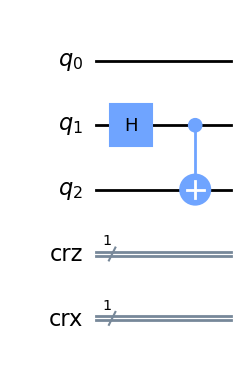

In [4]:
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw("mpl")

Alice (송신자)가 Bob (수신자)에게 보내고 싶은 상태가 아래 $|\psi\rangle$와 같다면
<p style="font-size:18px">$$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$$</p>  

현재까지의 상태를 수식으로 나타내면 아래와 같습니다.
<p style="font-size:16px">$$|\psi_0\rangle=|\psi\rangle\otimes|\beta_{00}\rangle=(\alpha|0\rangle+\beta|1\rangle)\otimes(\frac{|00\rangle+|11\rangle}{\sqrt2})=\frac{1}{\sqrt2}[\alpha|0\rangle(|00\rangle+|11\rangle)+\beta|1\rangle(|00\rangle+|11\rangle)]$$</p>

**<p style="font-size:17px">Step 1&2. Bob에게 정보 전송</p>**  
Alice는 자신의 첫번째 qubit를 control로 하는 CNOT gate를 적용함으로써 Bob에게 자신의 qubit를 전송합니다.

<img src="psi1.png" width="900px" height="400px" alt="psi1"></img>  
$$|\psi_1\rangle=CNOT_{1,2}[\frac{1}{\sqrt2}[\alpha|0\rangle(|00\rangle+|11\rangle)+\beta|1\rangle(|00\rangle+|11\rangle)]]=\frac{1}{\sqrt2}[\alpha|0\rangle(|00\rangle+|11\rangle)+\beta|1\rangle(|10\rangle+|01\rangle)]$$  

또한 Alice는 자신의 첫번째 qubit에 Hadamard gate를 적용합니다.
<img src="psi2.png" width="900px" height="400px" alt="psi2"></img>  

In [5]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

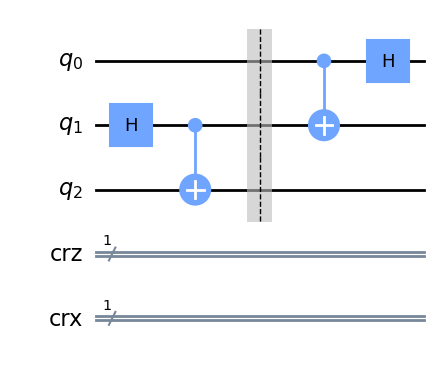

In [6]:
teleportation_circuit.barrier() # barrier 추가
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw("mpl")

**<p style="font-size:17px">Step 3. Alice 상태 측정</p>**  
Alice는 자신의 상태를 측정하고 classical channel을 통해 측정 결과를 전송합니다.

<p style="font-size:16px">$$|\psi_2\rangle=\frac{1}{\sqrt2}[|00\rangle(\alpha|0\rangle+\beta|1\rangle)+|01\rangle(\alpha|1\rangle+\beta|0\rangle)+|10\rangle(\alpha|0\rangle-\beta|1\rangle)+|11\rangle(\alpha|1\rangle-\beta|0\rangle)]$$</p>  
<img src="psi3.png" width="800px" height="300px" alt="psi3"></img>  

In [7]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

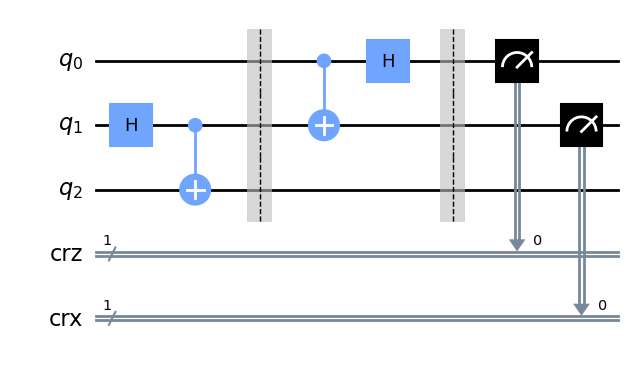

In [8]:
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw("mpl")

**<p style="font-size:17px">Step 4. Bob 수신 과정 </p>**  
Bob은 classical channel을 통해 받은 측정 결과를 바탕으로 처음 Alice가 보내고자 했던 상태를 갖기 위해 적절한 양자 게이트를 적용합니다.

<img src="psi4.png" width="800px" height="300px" alt="psi4"></img>  

In [9]:
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

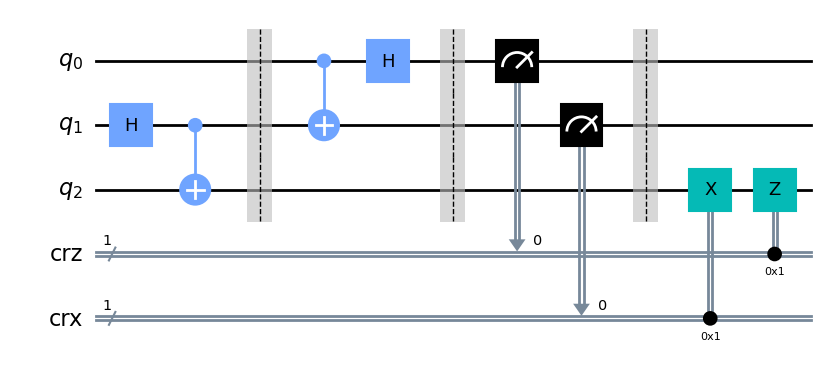

In [10]:
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw("mpl")